# Python Programming Exercises

### Exercise 1
Write a program to solve a classic puzzle: There are 35 heads and 94 legs among the chickens and rabbits in a farm. How many rabbits and how many chickens do we have? Hint: Use for loop to iterate all possible solutions

In [1]:
# c: the number of chickens
# r: the number of rabbits
# c + r = 35
# 2*c + 4*r = 94

for r in range(36):
    c = 35 - r
    if 2*c + 4*r == 94:
        print(f'We have {c} chickens and {r} rabbits.')

We have 23 chickens and 12 rabbits.


### Exercise 2
In this exercise, the task is to read a set of temperature data (the monthly high temperatures at Heathrow Airport from Jan 1948 through Dec 2016) from a file and then find some basic information: the highest and lowest temperatures, the mean (average) temperature, and the median temperature (the temperature in the middle if all the temperatures are sorted). The temperature data is in the file “data/Heathrow.txt”.

In [9]:
with open('data/Heathrow.txt', 'r') as f:
    rawdata = f.read()

# print(rawdata.encode())
data = rawdata.split('\n')
# print(data)
temperatures = [float(s) for s in data if s != '']
temperatures.sort()

lowest = temperatures[0]
highest = temperatures[-1]
mean = sum(temperatures)/len(temperatures)

if len(temperatures) % 2 == 1:
    median = temperatures[len(temperatures)//2]  # for odd number of elements
else:
    median = (temperatures[len(temperatures)//2 - 1] + temperatures[len(temperatures)//2]) / 2

print(f'{lowest=}, {highest=}, {mean=}, {median=}')

lowest=0.8, highest=28.2, mean=14.848309178743966, median=14.7


### Exercise 3
For the problem in Exercise 1, use NumPy by applying linear algebra to find the solution.

In [12]:
# c + r = 35
# 2*c + 4*r = 94
import numpy as np

coeffs = np.array([[1, 1], [2, 4]])
depvars = np.array([35, 94])

solution = np.linalg.solve(coeffs, depvars)
print(f'We have {solution[0]:.0f} chickens and {int(solution[1])} rabbits.')

We have 23 chickens and 12 rabbits.


### Exercise 4
Solve Exercise 2 by using NumPy.

In [15]:
import numpy as np

temp = np.loadtxt('data/Heathrow.txt')
# print(temp)

print(f'Lowest={np.min(temp)}, highest={np.max(temp)}')
print(f'Mean={np.mean(temp)}, median={np.median(temp)}')

Lowest=0.8, highest=28.2
Mean=14.848309178743962, median=14.7


### Exercise 5
Solve Exercise 2 by using Pandas. In addition, find out the coldest month and the hottest month between 1948 and 2016. Plot the mean temperature for each month.

             Temp
min      0.800000
max     28.200000
median  14.700000
mean    14.848309
Coldest year and month: Temp    0.8
Name: 1963-01, dtype: float64
Hottest year and month: Temp    28.2
Name: 2006-07, dtype: float64


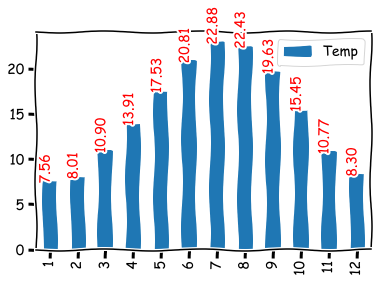

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Heathrow.txt', header=None, names=['Temp'])

print(df.aggregate(['min', 'max', 'median', 'mean']))

df.index = pd.period_range(start=1948, periods=len(df), freq='M')

df.sort_values(by=['Temp'], inplace=True)

print(f'Coldest year and month: {df.iloc[0]}')
print(f'Hottest year and month: {df.iloc[-1]}')

with plt.xkcd():
    groups = df.groupby(df.index.month)
    groups.mean().plot.bar()
    for i, j in enumerate(groups.mean().values):
        plt.text(i-0.4, j+0.2, f'{j[0]:.2f}', color='red', rotation='vertical')
    plt.show()

### Exercise 6
Plot two cycles of a sinusoidal voltage waveform with an amplitude of 2 and frequency of 50Hz and a DC offset of 5V. Calculate the average voltage and root mean square (RMS) voltage.

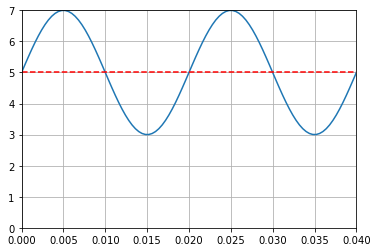

Mean voltage: 5.00
RMS voltage: 5.194246626778708


In [47]:
import numpy as np
import matplotlib.pyplot as plt

f = 50
t = np.linspace(0, 0.04, 101)
v = 2 * np.sin(2 * np.pi * f * t) + 5

plt.plot(t, v)
plt.axhline(5, color='red', ls='--')
plt.xlim(0, 0.04)
plt.ylim(0, 7)
plt.grid(True)
plt.show()

print(f'Mean voltage: {np.mean(v):.2f}')

print(f'RMS voltage: {np.sqrt(np.mean(np.square(v)))}')

### Exercise 7
Below are the data points of a sawtooth current:\
    f2 = 50\
    t2 = np.linspace(0, 0.04, 41)\
    i = 2 * (f2 * t2 - np.floor(0.5 + f2 * t2)) + 1

Plot the current and the power if the voltage is as shown in Exercise 6.

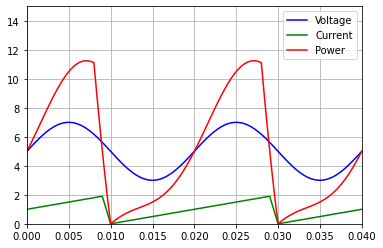

In [56]:
import pandas as pd
f2 = 50
t2 = np.linspace(0, 0.04, 41)
i = 2 * (f2 * t2 - np.floor(0.5 + f2 * t2)) + 1

s1 = pd.Series(i)
s1.index = pd.to_timedelta(t2, unit='s')
s2 = s1.resample('0.4ms').interpolate(method='linear')

i2 = s2.values
p = v * i2

plt.plot(t, v, 'b', label='Voltage')
plt.plot(t2, i, 'g', label='Current')
plt.plot(t, p, 'r', label='Power')
plt.xlim(0, 0.04)
plt.ylim(0, 15)
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Exercise 8
A voltage waveform has been downloaded from an oscilloscope by using PyVISA. The waveform is stored in the CSV file format and the file can be accessed as 'data/waveform_data.csv'. Load and plot the waveform from the CSV file.